# Assignment-03 First Step of Machine Learning : Model and Evaluation

机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review

### Re-code the Linear-Regression Model using scikit-learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [2]:
%matplotlib inline

In [3]:
dataset = load_boston()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
X = np.array(df['RM'])
Y = dataset.target

In [5]:
X.shape, Y.shape

((506,), (506,))

[scikit-learn linear regression document](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [6]:
reg = LinearRegression()

In [7]:
reg.fit(np.array(X).reshape(-1,1), Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

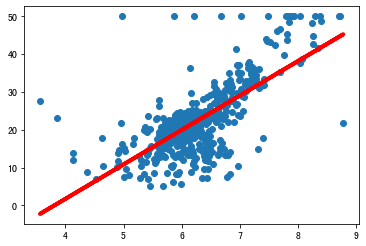

In [8]:
plt.scatter(X, Y)
plt.plot(X, reg.predict(X.reshape(-1, 1)), color='red', linewidth=4)

### Complete the unfinished KNN Moel using puring Python to solve the previous Linear-Regression problem

In [9]:
import numpy as np
import collections
from scipy.spatial.distance import cosine
from sklearn.datasets import load_iris

In [10]:
def cosine_distance(x1, x2):
    return cosine(x1, x2)

In [11]:
class KNN(object):
    """
    K Nearest Neighbors model.
    """
    def __init__(self, k=5, distance=cosine_distance):
        self._k = k
        self._distance = distance


    def fit(self, X, Y):
        self._X = X
        self._y = Y
        self.model = [(xi, yi) for xi, yi in zip(X, Y)]

    def predict(self, x):
        k = self._k
        distance = self._distance

        most_similars = sorted(self.model, key=lambda xi: distance(xi[0], x))[:k]
        counter = collections.Counter(np.array(most_similars)[:, 1])
        return counter.most_common(1)[0][0]
    

In [12]:
# load dataset

dataset = load_iris()

In [13]:
X = dataset.data[:, :2]
Y = dataset.target

In [14]:
df = pd.DataFrame(np.hstack([X, Y.reshape(-1, 1)]), columns=dataset.feature_names[:2] + ['category'])

In [15]:
df.head()

,sepal length (cm),sepal width (cm),category
0,5.1,3.5,0.0
1,4.9,3.0,0.0
2,4.7,3.2,0.0
3,4.6,3.1,0.0
4,5.0,3.6,0.0


In [16]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
setosa = df[df.category==0]
versicolor = df[df.category==1]
virginica = df[df.category==2]

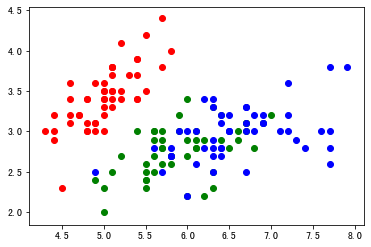

In [18]:
plt.scatter(setosa.iloc[:, 0], setosa.iloc[:, 1], color='red')
plt.scatter(versicolor.iloc[:, 0], versicolor.iloc[:, 1], color='green')
plt.scatter(virginica.iloc[:, 0], virginica.iloc[:,1], color='blue')

In [19]:
X.shape, Y.shape

((150, 2), (150,))

In [20]:
knn = KNN(5)
knn.fit(X, Y)

knn.predict(setosa.iloc[0, :2]) == setosa.iloc[0, 2]

True

In [21]:
setosa.iloc[0]

sepal length (cm)    5.1
sepal width (cm)     3.5
category             0.0
Name: 0, dtype: float64

In [22]:
knn.predict([7.5, 3])

2

### Re-code the Decision Tree, which could sort the features by salience.

**feature selection**

如何评价特征选择的好坏?

信息增益.

参考：*统计学习方法* 5.2.2 信息增益

信息熵

$$H(X) = - \sum{P(X)\log{P(x)}}$$

**信息增益算法**

输入：训练数据集D和特征A

输出：特征A对训练数据集D的信息熵的增加$g(D, A)$

1. 计算数据集D的熵$H(D)$

$$H(D)=-\sum_{k=1}^{K}\frac{|C_k|}{|D|}\log\frac{|C_k|}{|D|}$$

2. 计算特征A对数据集D的条件熵$H(D|A)$

$$H(D|A)=\sum_{i=1}^{n}\frac{|D_i|}{|D|}H(D_i) = \sum_{i=1}^{n}\frac{|D_i|}{|D|}\sum_{k=1}^{K}\frac{|D_{ik}|}{|D_i|}\log\frac{|D_{ik}|}{|D_i|}$$

3. 计算信息增益

$$g(D,A) = H(D) - H(D|A)$$

In [23]:
import collections
import numpy as np
import pandas as pd

In [291]:
def entroy(dataset:list):
    """
    entropy
    """
    N = len(dataset)
    counter = collections.Counter(dataset)
    probs= [counter[xi]/N for xi in counter]
    return -sum([p * np.log2(p) for p in probs])

In [292]:
entroy(['a', 'a', 'a'])

-0.0

In [293]:
entroy(['a', 'a', 'b', 'b', 'c'])

1.5219280948873621

In [321]:
def gain(dataset1:list, dataset2:list):
    """
    information gain
    """
    dataset = dataset1 + dataset2
    dataset_ent = entroy(dataset)
    dataset1_ent = entroy(dataset1)
    dataset2_ent = entroy(dataset2)

    dataset1_prob = len(dataset1)/len(dataset)

    return dataset_ent - sum([dataset1_prob * dataset1_ent, (1 - dataset1_prob) * dataset2_ent])
    

In [317]:
l = ['a', 'a', 'b', 'b', 'c', 'c']

In [324]:
gain(l[:2], l[2:])

0.9182958340544893

In [325]:
gain(l[:3], l[3:])

0.6666666666666665

**Build dicision tree**

In [328]:
class Node(object):
    """
    Tree Node.
    """
    def __init__(self, feature=None, left=None, right=None, results=None, **kwargs):
        self.feature = feature
        self.left = left
        self.right = right
        self.results = results

In [330]:
def divide_dataset(dataset, col, val):
    """
    divide dataset based on column and value
    """
#     TODO

In [339]:
def build_tree(dataset:pd.DataFrame, target:str, **kwargs):
    """
    Build dicision tree.
    """
    if dataset.empty: return None

    cols = dataset.columns[:-1]
    best_gain = 0.0
    min_entropy = float(np.inf)
    org_entropy = entroy(dataset[target])
    best_feature = ()
    split_dataset = []

    # choose feature
    for col in cols:
        for val in set(dataset[col]):
            dataset1, dataset2 = divide_dataset(dataset, col, val)

            info_gain = gain(dataset1, dataset2)
            if info_gain > best_gain:
                best_gain = info_gain
                best_feature = (col, val)
                split_dataset = (dataset1, dataset2)

    if best_gain > : 
        left_node = build_tree(split_dataset[0], target)
        right_node = build_tree(split_dataset[1], target)
        return Node(feature=feature, left=left_node, right=right_node,
                    results=dataset[target])
    else:
         return Node(results=dataset[target])
    

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

### Finishing the K-means using 2-D matplotlib

TODO

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

## Part-2 Question and Anwser

Q: What's the model? Why all the models are wrong, but some are useful?

TODO

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

Q: What's underfitting and overfitting? List the reasons that could make model overfitting and underfitting?

TODO

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

Q: What's the precision, recall, AUC, F1, F2score, What are they mainly target on?

TODO

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

Q: Based on your course and yourself mind, what's the machine leanging?

TODO

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

Q: "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？

TODO

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-3 Programming Practice

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a completed Decision Tree Model. You show finish a predicate() function, which accepts three parameters <gender, income, family_number>, and outputs the predicated 'bought': 1 or 0.

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。

TODO

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)